## Gapminder Project Ismael Martínez

### Data Exploratory Analysis of the Gapminder Dataset

The Data is obtained from the __[Gapminder Foundation](https://www.gapminder.org/data/)__.
The focus will be on the development of life expectancy of a number of countries through time considering their population size and continent.

#### Step 1 and Step 2
Import libraries, load Files into pandas DataFrames:

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)

#### Step 3

Check the shape of both tables:

In [3]:
fert.info() #where are the NaNs?
fert.shape

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to Åland
Columns: 216 entries, 1800 to 2015
dtypes: float64(216)
memory usage: 440.8+ KB


(260, 216)

In [4]:
life.info()
life.shape

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to South Sudan
Columns: 217 entries, 1800.0 to 2016.0
dtypes: float64(217)
memory usage: 442.8+ KB


(260, 217)

In [5]:
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
life.head(3)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 4

Examining columns:

In [7]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [8]:
type (fert.columns[6]) #it's actually a string

str

In [9]:
life.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [10]:
fert.columns=fert.columns.astype(float) #they're easy to change here

In [11]:
fert.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
              2014.0, 2015.0],
             dtype='float64', length=216)

#### Step 5

Check row index of the table and set the right index name:

In [12]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

Change the name of the index to 'country':

In [13]:
fert.index.name = 'country'

In [14]:
fert.head(3)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 6

Move row index into a column and convert to long format:

In [15]:
fert = fert.reset_index()

In [16]:
fert.head(3)

,country,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
fert.columns

Index(['country',    1800.0,    1801.0,    1802.0,    1803.0,    1804.0,
          1805.0,    1806.0,    1807.0,    1808.0,
       ...
          2006.0,    2007.0,    2008.0,    2009.0,    2010.0,    2011.0,
          2012.0,    2013.0,    2014.0,    2015.0],
      dtype='object', length=217)

In [18]:
fert.index

RangeIndex(start=0, stop=260, step=1)

In [19]:
#the next two lines work as an alternative to the two previous steps, resetting the index first
#fert = fert.reset_index()
#fert.rename(mapper={'Total fertility rate':"country"}, axis=1, inplace=True) #alternative, axis=1 represents columns

In [20]:
wide_fert = fert.melt(
            id_vars='country', #identifier variable
            var_name='year', #column for all measured variables
            value_name='fertility_rate') #column for their corresponding values

In [21]:
wide_fert.head(3)

,country,year,fertility_rate
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,7.0
2,Akrotiri and Dhekelia,1800.0,NaN


In [22]:
wide_fert.info()
#why is year an object and fertility rate a float64? Because it's the var_name?
#why did we want to transform the nummeral years to ints/floats anyway?                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56160 entries, 0 to 56159
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         56160 non-null  object 
 1   year            56160 non-null  object 
 2   fertility_rate  43412 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [23]:
wide_fert.index

RangeIndex(start=0, stop=56160, step=1)

#### Step 7

Same procedure for the life expectancy data:

In [24]:
life.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [25]:
life.index.name = 'country'

In [26]:
life = life.reset_index() ###don't forget the brackets

In [27]:
life.head(3)

,country,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wide_life = life.melt(id_vars='country',
                 var_name='year',
                 value_name='life_expectancy')

In [29]:
wide_life.info()
wide_life.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56420 non-null  object 
 1   year             56420 non-null  object 
 2   life_expectancy  43857 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


,country,year,life_expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN


In [30]:
wide_life.index

RangeIndex(start=0, stop=56420, step=1)

#### Step 8

Same procedure with population data:

In [31]:
popul = pd.read_excel('../data/gapminder_population.xlsx')

In [32]:
popul.head()

,Total population,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


Checking the dtypes:

In [33]:
popul.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 82 entries, Total population to 2015.0
dtypes: float64(81), object(1)
memory usage: 176.3+ KB


In [34]:
popul.index

RangeIndex(start=0, stop=275, step=1)

Renaming the first column:

In [35]:
popul.columns[1]

1800.0

In [36]:
popul.rename(mapper={'Total population':'country'}, axis=1, inplace=True)

In [37]:
popul.head()

,country,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [38]:
popul.index

RangeIndex(start=0, stop=275, step=1)

In [39]:
wide_popul = popul.melt(
    id_vars = 'country', 
    var_name = 'year',
    value_name = 'population')

In [40]:
wide_popul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22275 entries, 0 to 22274
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     22275 non-null  object 
 1   year        22275 non-null  object 
 2   population  20176 non-null  float64
dtypes: float64(1), object(2)
memory usage: 522.2+ KB


In [41]:
wide_popul.head(3)

,country,year,population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN


In [42]:
wide_popul.columns

Index(['country', 'year', 'population'], dtype='object')

In [43]:
wide_popul.index

RangeIndex(start=0, stop=22275, step=1)

Step 9:

Merging the wide fertility and population data frames:

In [44]:
df = wide_fert.merge(wide_popul)

In [45]:
df

,country,year,fertility_rate,population
0,Abkhazia,1800.0,NaN,NaN
1,Afghanistan,1800.0,7.00,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN,NaN
3,Albania,1800.0,4.60,410445.0
4,Algeria,1800.0,6.99,2503218.0
...,...,...,...,...
20974,Yugoslavia,2015.0,NaN,NaN
20975,Zambia,2015.0,5.59,16211767.0
20976,Zimbabwe,2015.0,3.35,15602751.0
20977,Åland,2015.0,NaN,NaN


In [46]:
df = df.merge(wide_life)

In [47]:
df

,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800.0,NaN,NaN,NaN
1,Afghanistan,1800.0,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN,NaN,NaN
3,Albania,1800.0,4.60,410445.0,35.40
4,Algeria,1800.0,6.99,2503218.0,28.82
...,...,...,...,...,...
20974,Yugoslavia,2015.0,NaN,NaN,NaN
20975,Zambia,2015.0,5.59,16211767.0,56.70
20976,Zimbabwe,2015.0,3.35,15602751.0,59.30
20977,Åland,2015.0,NaN,NaN,NaN


Step 10

Scatterplot for one particular year

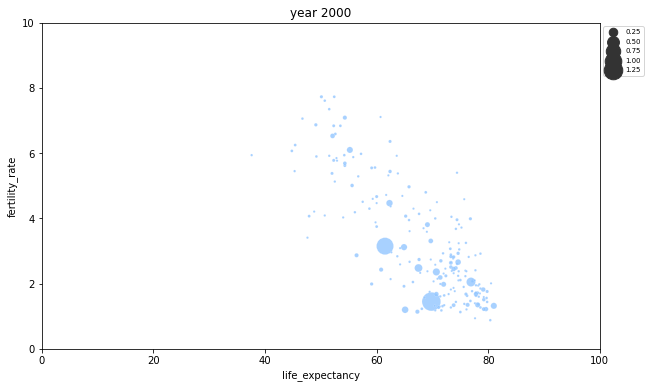

In [48]:
df_subset = df.loc[df['year'] == 2000]
yearpl = '2000'
plt.figure(figsize=(10,6))
plt.axis(xmin=0,xmax=100,ymin=0,ymax=10)
sns.scatterplot(x='life_expectancy', y='fertility_rate', size='population',
                sizes = (5, 350), data=df_subset, alpha=0.8, legend='brief')
plt.title(label=f'year {yearpl}' )
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='x-small') #loc=2 is for upper left

Step 11

In [53]:
for yearpl in range (1960,2016) :
    df_subset = df.loc[df['year'] == yearpl]
    plt.figure(figsize=(12,8))
    plt.axis(xmin=0,xmax=100,ymin=0,ymax=10)
    sns.scatterplot(x='life_expectancy', y='fertility_rate', size='population',
                    sizes = (5, 400), data=df_subset, alpha=0.6)
    plt.title(label=f'year {yearpl}')
    plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='x-small')
    plt.savefig('../data/png/lifeexp_'+str(yearpl)+'.png')  
    plt.close()

Step 12

Add the parameter size='population' to the scatterplot generating loop

Step 13

In [50]:
#pip install imageio

In [51]:
import imageio

images = []

for i in range (1960,2016):    
    #filename = 'lifeexp_'+str(i)+'.png' #alternativ
    filename = 'lifeexp_{}.png'.format(i)
    path = '/data/'
    #print (filename)
    images.append(imageio.imread(path+filename))
imageio.mimsave('output.gif', images,fps=5) #consider using .imwrite() instead

Additional Step: include continent information

In [52]:
cont = pd.read_csv ('../data/continents.csv', delimiter=';')

In [53]:
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [54]:
df_co = df.merge(cont)

In [55]:
df_co

,country,year,fertility_rate,population,life_expectancy,continent
0,Afghanistan,1800.0,7.00,3280000.0,28.21,Asia
1,Afghanistan,1810.0,7.00,3280000.0,28.11,Asia
2,Afghanistan,1820.0,7.00,3323519.0,28.01,Asia
3,Afghanistan,1830.0,7.00,3448982.0,27.90,Asia
4,Afghanistan,1840.0,7.00,3625022.0,27.80,Asia
...,...,...,...,...,...,...
14170,Zimbabwe,2011.0,3.64,14255592.0,51.60,Africa
14171,Zimbabwe,2012.0,3.56,14565482.0,54.20,Africa
14172,Zimbabwe,2013.0,3.49,14898092.0,55.70,Africa
14173,Zimbabwe,2014.0,3.41,15245855.0,57.00,Africa


In [58]:
for yearpl in range (1960,2016) :
    df_subset = df_co.loc[df_co['year'] == yearpl]
    plt.figure(figsize=(10,6))
    plt.axis(xmin=0,xmax=100,ymin=0,ymax=10)
    sns.scatterplot(x='life_expectancy', y='fertility_rate', size='population',
                    sizes = (5, 400), hue='continent', data=df_subset, alpha=0.7)
    plt.title(label=f'year {yearpl}')
    plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='x-small')
    plt.savefig('lifeexpco_'+str(yearpl)+'.png')  
    plt.close()

In [61]:
images = []

for i in range (1960,2016):    
    #filename = 'lifeexp_'+str(i)+'.png' #alternativ
    filename = 'lifeexpco_{}.png'.format(i)
    #print (filename)
    images.append(imageio.imread(filename))
imageio.mimsave('outputco.gif', images,fps=5)